# Gradient Descent

Suppose you have a multi-variable real-valued function $f:\mathbb{R}^{n}\rightarrow \mathbb{R}$ for which you want to find the input $\mathbf{x}$ that produces the smallest possible output $f(\mathbf{x})$. For example, $f$ could be the error associated with a machine learning algorithm with model parameters $\mathbf{x}$.  One way to minimize $f$ is to use a first-order iterative optimization algorithm called *gradient descent*.  Gradient descent is one of the most popular optimization strategies due to its simplicity, and it is used throughout machine learning and deep learning.

The easiest way to understand gradient descent is through the classic "hill-climbing" analogy: Suppose that you are on the side of a mountain and you want to get to the top.  However, you are blindfolded and unable to see which way you should go. And so, you begin by feeling the ground around you and take steps in the steepest direction. If you continue this long enough, eventually you will come to a point where it is no longer possible to take a step upwards. This process is described mathematically by *gradient ascent*; gradient descent focuses on getting down the mountain rather than climbing it.

In order to ascend or descend the mountain, we want to take steps in the steepest direction.  The gradient of a function points in the direction of the greatest rate of increase in the function, and the magnitude of the gradient is the slope of the function in that direction.  And so, if we which to ascend the mountain, we need to take steps proportional to the of the gradient at our current location, and to descend the mountain, we take steps proportional to the negative of the gradient.

https://en.wikipedia.org/wiki/Gradient  
https://en.wikipedia.org/wiki/Gradient_descent

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import animation
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from numpy.polynomial.polynomial import Polynomial

from IPython.display import HTML

## Gradient Descent Algorithm

In [2]:
def gradient_descent(gradient, x_init, max_iters=100000, alpha=0.01, precision=1e-6):
    cur_x = x_init
    step_size = 1.0
    iters = 0

    while step_size > precision and iters < max_iters:
        prev_x = cur_x
        cur_x = cur_x - alpha * gradient(cur_x)
        step_size = np.linalg.norm(cur_x - prev_x)
        iters += 1

        if not np.isfinite(cur_x).all():
            break
    return cur_x, step_size <= precision

## Visualizations

The following function, `visualize_2d_gradient_descent`, can be used to visualize the gradient descent algorithm on a function in a single variable.  The arguments are as follows:
  * `function` - the function being minimized
  * `gradient` - the gradient of the given function
  * `x_init` - the starting point for the algorithm
  * `alpha` - how far to step along the gradient
  * `precision` - the algorithm terminates when a step is taken that is less than precision

In [3]:
def visualize_2d_gradient_descent(
    function,
    gradient,
    x_init,
    max_iters=100000,
    alpha=0.01,
    precision=1e-6,
    first_frame=0,
    last_frame=None,
    max_frames=100,
    aspect="equal",
    xlim=(-5,5),
    ylim=(-5,5)
):    
    def _gradient_descent(gradient, x_init, max_iters, alpha, precision):
        cur_x = x_init
        step_size = 1.0
        iters = 0

        steps = [(cur_x, step_size, gradient(cur_x))]
        while step_size > precision and iters < max_iters:
            prev_x = cur_x
            cur_x = cur_x - alpha * gradient(cur_x)
            step_size = np.linalg.norm(cur_x - prev_x)
            iters += 1

            steps.append((cur_x, step_size, gradient(cur_x)))
            if not np.isfinite(cur_x).all():
                break
        return cur_x, step_size <= precision, steps

    def _animate_gradient_descent(steps, function, first_frame, last_frame,
                                 max_frames, aspect, xlim, ylim):
        if last_frame is None:
            last_frame = len(steps)
        if (last_frame-first_frame) > max_frames:
            frame_step = (last_frame-first_frame) // max_frames
        else:
            frame_step = 1
        print(len(steps), "Steps;", end=" ")
        steps = steps[first_frame:last_frame:frame_step]
        print(len(steps)-1, "Frames")

        fig, ax = plt.subplots()
        plt.grid(True, color="black", linestyle="dotted")
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_aspect(aspect)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        xx = np.linspace(xlim[0],xlim[1],100)
        function_line, = ax.plot([], [], c="black", zorder=2)
        gradient_line, = ax.plot([], [], c="blue", linestyle="dashed", zorder=1)
        step_lines, = ax.plot([], [], c="red", linestyle="dotted", zorder=0)
        min_point = ax.scatter([], [], c="blue", zorder=3)

        label = ax.text(
            x=xlim[0]+(xlim[1]-xlim[0])/100.,
            y=ylim[0]+(ylim[1]-ylim[0])/100.,
            s="",
            color="black"
        )

        # ceate the first frame
        def init():
            cur_x, step_size, gradient = steps[0]
            point = [cur_x, function(cur_x)]

            function_line.set_data(xx, function(xx))

            if gradient == 0.0:
                gradient_line.set_xdata([xx,xx])
                gradient_line.set_ydata(ylim)
            else:
                gradient_line.set_xdata(xlim)
                gradient_line.set_ydata([
                    gradient * (xlim[0] - point[0]) + point[1],
                    gradient * (xlim[1] - point[0]) + point[1]
                ])

            min_point.set_offsets(point)

            return function_line, gradient_line, min_point

        # draw a frame using the gd point xx
        counter = np.asarray([0])
        def animate(ii, n_frames):
            print(ii, end=" ")
            if ii+1 == n_frames:
                print("done.")

            cur_x, step_size, gradient = steps[ii]
            cur_point = [cur_x, function(cur_x)]
            next_x, _, _ = steps[ii+1]
            next_point = [next_x, function(next_x)]

            if gradient == 0.0:
                gradient_line.set_xdata([xx,xx])
                gradient_line.set_ydata(ylim)
            else:
                gradient_line.set_xdata(xlim)
                gradient_line.set_ydata([
                    gradient * (xlim[0] - cur_point[0]) + cur_point[1],
                    gradient * (xlim[1] - cur_point[0]) + cur_point[1]
                ])

            step_lines.set_data(
                [cur_point[0], next_point[0], next_point[0]],
                [cur_point[1], cur_point[1], next_point[1]]
            )

            min_point.set_offsets(cur_point)

            txt = "x = {:0.7f}\n$\\delta$ = {:0.7f}\n$\\nabla f(x) = {:0.7f}$"
            txt = txt.format(cur_x, step_size, gradient)
            label.set_text(txt)

            return gradient_line, step_lines, min_point

        anim = animation.FuncAnimation(
            fig,
            animate,
            init_func=init,
            frames=range(0,len(steps)-1),
            fargs=(len(steps)-1,),
            interval=500,
            blit=True
        )
        return anim
    
    x_min, converged, steps = _gradient_descent(gradient, x_init, max_iters, alpha, precision)
    anmi = _animate_gradient_descent(steps, function, first_frame, last_frame, max_frames, aspect, xlim, ylim)
    return x_min, converged, anmi

## Polynomials

To better understand gradient descent, we will begin by funding the minimum value of polynomials. A polynomial is completely determined by its coefficnets. And so, we will represent the ponlynomial $$f(x)=a_{n}x^{n}+a_{n-1}x^{n-1}+\cdots a_{1}x^{1}+a_{0}$$ as the tuple $$(a_{0},a_{1},\ldots,a_{n-1},a_{n})\ .$$
That is to say, the coefficent $a_{i}$ of the $i$th degree term is at index $i$ in the coresponding tuple.

Examples:
  * $f(x)=3x^{2}+2{x}-5$ is represented as $(-5,2,3)$.
  * $f(x)=x^{6}-10x^{4}+3x^{3}+5$ is represented as $(5,0,0,3,-10,0,1)$.

The `numpy` package contains a [`Polynomial`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.Polynomial.html#numpy.polynomial.polynomial.Polynomial) class that can be used to represent polynomials as well as take their derivatives.

## Example 1a

Let's use gradient descent to find the minimum of the function $f(x)=x^{2}$.

In [4]:
xlim = (-10,10)
ylim = (-1,19)
coef = (0,0,1)
fun = Polynomial(coef)
grad = fun.deriv()
x_init = 3.5
alpha = 0.25

Run the gradient descent algorithm with `x_init=3.5` and `alpha=0.25`.  In the following visualization, the solid black line represents our function we want to minimize, the dashed blue line represents the gradient (i.e, derivative) of the function at the given point, and the red line represents the step taken proportional to the negative of the gradient.

Notice that the algorithm converges to a number very close to `0.0`.

23 Steps; 22 Frames
Min X: 8.344650268554688e-07
Min Y: 6.963318810448982e-13
Converged: True
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 done.


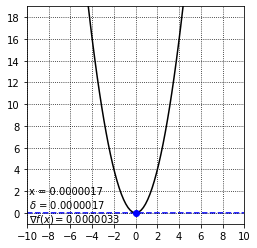

In [5]:
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, x_init, alpha=alpha, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Min Y:", fun(x_min))
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 1b

Notice that the value of `alpha` controls the length of the steps taken.  If it is too small, the algorithm requires more iterations to converge. In this example, we change the value of `alpha` from `0.25` to `0.01`.

555 Steps; 110 Frames
Min X: 4.822963530893101e-05
Min Y: 2.3260977220324843e-09
Converged: True
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 done.


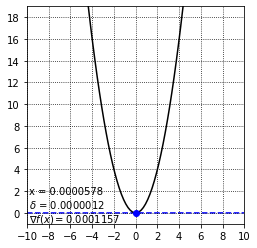

In [6]:
alpha = 0.01
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, x_init, alpha=alpha, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Min Y:", fun(x_min))
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 1c

If `alpha` is set too large, it can cause the gradient descent algorithm to "jump over" the solution.  In this example, we set `alpha=0.85`.

46 Steps; 45 Frames
Min X: -3.745241654825915e-07
Min Y: 1.4026835053043156e-13
Converged: True
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 done.


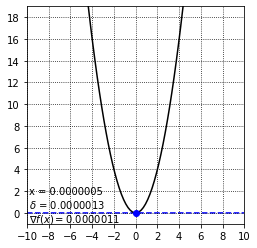

In [7]:
alpha = 0.85
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, x_init, alpha=alpha, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Min Y:", fun(x_min))
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 2a

When `alpha` is too large, it can also cause the algorithm to miss the minimum and diverge.

Taking $f(x)=4x^{2}$ with an initial starting point of `x_init=10.0` and setting `alpha=0.275` is enough to cause the gradient descent algorithm to fail to converge.

In [8]:
xlim = (-50,50)
ylim = (-1000,10000)
coef = (0,0,4)
fun = Polynomial(coef)
grad = fun.deriv()
x_init = 10.0
alpha = 0.275

/home/tntech.edu/rsingh43/virtualenvs/rina/lib64/python3.6/site-packages/numpy/polynomial/polynomial.py:735: RuntimeWarning: overflow encountered in double_scalars
  c0 = c[-i] + c0*x
/home/tntech.edu/rsingh43/virtualenvs/rina/lib64/python3.6/site-packages/numpy/polynomial/polynomial.py:733: RuntimeWarning: invalid value encountered in double_scalars
  c0 = c[-1] + x*0
/home/tntech.edu/rsingh43/virtualenvs/rina/lib64/python3.6/site-packages/numpy/polynomial/polynomial.py:733: RuntimeWarning: invalid value encountered in double_scalars
  c0 = c[-1] + x*0


3871 Steps; 14 Frames
Min X: inf
Min Y: nan
Converged: False
0 1 2 3 4 5 6 7 8 9 10 11 12 13 done.


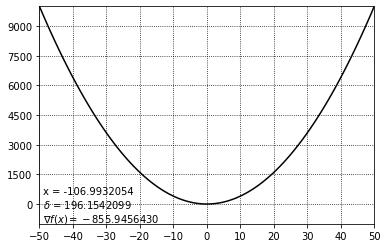

In [9]:
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, x_init, alpha=alpha, aspect="auto", last_frame=15, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Min Y:", fun(x_min))
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 2b

On rare occasions, it is also possible that the algorithm will fail to converge due to oscillations.  Setting `alpha=0.25` will cause gradient descent to oscillate back and forth, failing to converge or diverge.

100001 Steps; 14 Frames
Min X: 10.0
Min Y: 400.0
Converged: False
0 1 2 3 4 5 6 7 8 9 10 11 12 13 done.


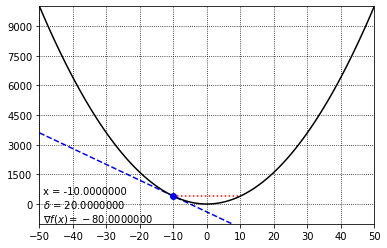

In [10]:
alpha = 0.25
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, x_init, alpha=alpha, aspect="auto", last_frame=15, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Min Y:", fun(x_min))
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 3

One of the problems with gradient descent is that it can get stuck in a local minimum and fail to find the global minimum.

In this example, we take $f(x)=x^4-5x^3+5x^2+5x-3$ and `x_init=5.0`.

In [11]:
xlim = (-5,7)
ylim = (-6,6)
fun = Polynomial((-3,5,5,-5,1))
grad = fun.deriv()
x_init = 5.0
alpha = 0.01

78 Steps; 38 Frames
Min X: 2.6072576885940704
Min Y: 1.617250870772141
Converged: True
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 done.


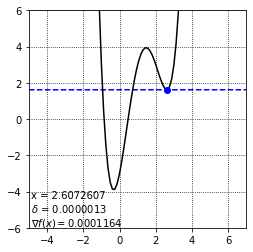

In [12]:
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, x_init, alpha=alpha, max_frames=30, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Min Y:", fun(x_min))
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 4

Gradient descent can also suffer from the **vanishing gradient** problem: when the gradient of a function is zero (or numerically close to zero) it is said to vanish. In such cases, the algorithm will not converge to a solution, but neither will it many any progress towards fining a minimum.

Consider the following function $$f(x)=-1\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^{2}}\ ,$$ and its derivative $$f^{\prime}(x)=\frac{e^{-\frac{x^{2}}{2}}x}{\sqrt{2\pi}}\ .$$

If our initial guess is too far away from the minimum, gradient descent has no hope of making any progress.

We are going to define [lambda functions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) to represent $f$ and its derivative.

In [13]:
xlim = (-10,10)
ylim = (-0.5,0.25)
fun = lambda xx: -1.0 / np.sqrt(2*np.pi) * np.power(np.e, -0.5 * np.power(xx,2))
grad = lambda xx: (np.power(np.e, -(np.power(xx,2)/2))*xx) / np.sqrt(2*np.pi)
x_init = 5.0

2 Steps; 1 Frames
Min X: 4.999999925664024
Converged: True
0 done.


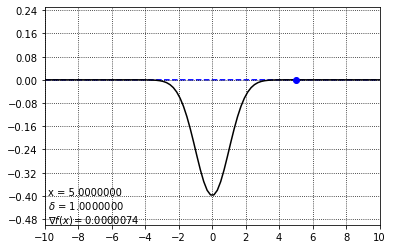

In [14]:
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, x_init, aspect="auto", xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 5

In practice, the gradient descent algorithm is often run several times in an attempt to overcome the issues described above.  For this example, consider the following function:
$$f(\theta)=-\frac{\sin(\theta)}{\theta}\ ,\quad f^{\prime}(\theta)=\frac{\sin(\theta) - \theta\cos(\theta)}{\theta^{2}}\ .$$
This function has a distinct global minimum and an infinite number of local minima.  In addition, as $\theta$ tends to positive or negative infinity, the gradient gets arbitrary small (i.e., vanishes).

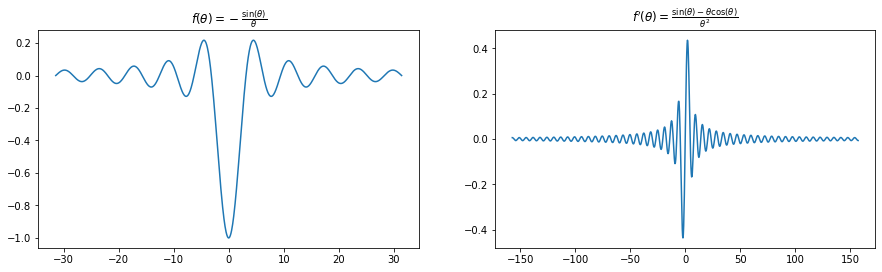

In [15]:
xlim = (-10*np.pi,10*np.pi)
ylim = (-1,1)
fun = lambda xx : - np.sin(xx)/xx
grad = lambda xx : (np.sin(xx) - xx * np.cos(xx))/np.power(xx,2)

fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,2)

xx = np.linspace(xlim[0], xlim[1], 1000)
ax = fig.add_subplot(gs[0])
ax.plot(xx, fun(xx))
ax.set_title("$f(\\theta)=-\\frac{\\sin(\\theta)}{\\theta}$")

xx = np.linspace(xlim[0], xlim[1], 1000)*5
ax = fig.add_subplot(gs[1])
ax.plot(xx, grad(xx))
ax.set_title("$f^{\\prime}(\\theta)=\\frac{\\sin(\\theta) - \\theta\\cos(\\theta)}{\\theta^{2}}$")

plt.show()

In order to find the global minimum of $$f(\theta)=-\frac{\sin(\theta)}{\theta}\ ,$$ we will call the gradient descent algorithm using several different starting locations.  We can use the [`numpy.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) function to obtain evenly spaced numbers over a specified interval for use as starting locations.  We can then use the [map](https://docs.python.org/3/library/functions.html#map) function to apply our `gradient_descent` function to each of the starting points.  Depending on the starting locations, we may or may not find the global minimum.

Min X: -0.0002989213811024447
Min Y: -0.9999999851076681


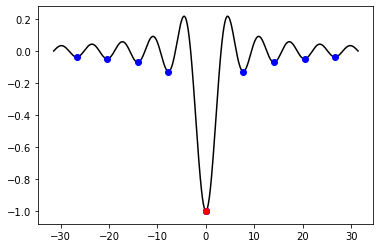

In [16]:
alpha = 0.01

# get 10 evenly spaced values between -25 and 25
inital_points = np.linspace(-25, 25, 10)

# create a lambda function to call the gradient_descent function
# with the desired arguments
apply_gradient_descent = lambda x_init : gradient_descent(grad, x_init, alpha=alpha)

# use the map function to apply gradient descent to our initial
# starting locations
results = list(map(apply_gradient_descent, inital_points))

# convert the results to a np.ndarray
# the first column contains the x values
# the second column contains a bool indicating convergence
results = np.asarray(results)

# set the second column to the y value of our function
results[:,1] = fun(results[:,0])

# get the location of the minimum y value and retrieve
# the corresponding x value
index = np.argmin(results[:,1])
print("Min X:", results[index,0])
print("Min Y:", results[index,1])

# plot all of the values found
xx = np.linspace(xlim[0], xlim[1], 1000)

fig,ax = plt.subplots()
ax.plot(xx, fun(xx), "black", zorder=0)
ax.scatter(results[:,0], results[:,1], c="blue", zorder=1)
ax.scatter(results[index,0], results[index,1], c="red", zorder=2)
plt.show()